In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_validate, ShuffleSplit, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, f1_score, precision_recall_fscore_support 
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
sys.path.append('..')

C:\Users\mraja\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
data_path = os.path.join(os.getcwd(), 'cup98lrn', 'CharityContribution_Learn.csv')
bristol = pd.read_csv(data_path)
bristol.shape
bristol.head()

,Origin_Date,Zipcode,Mail_Code,Do_Not_Exchange_Flag,In_House_File_Flag,P3_File_Flag,Planned_Giving_File_Flag,Sweepstakes_File_Flag,Neighborhood_Status.1,Demographic_Cluster,...,Recency_Code_For_Mdmaud__DormantDonor,Recency_Code_For_Mdmaud__InactiveDonor,Recency_Code_For_Mdmaud__LapsedDonor,Frequecy_Code_For_Mdmaud__1.0,Frequecy_Code_For_Mdmaud__2.0,Frequecy_Code_For_Mdmaud__5.0,Donation_Amount_Code_For_Mdmaud__CoreDoner_100plus,Donation_Amount_Code_For_Mdmaud__LessDonor,Donation_Amount_Code_For_Mdmaud__MajorDoner_500plus,Donation_Amount_Code_For_Mdmaud__TopDonor_1000plus
0,8901,56475,0,0,0,0,0,0,3,51,...,0,0,0,0,0,0,0,0,0,0
1,9101,93527,0,0,0,0,0,0,1,35,...,0,0,0,0,0,0,0,0,0,0
2,9001,55112,0,0,0,0,0,0,2,17,...,0,0,0,0,0,0,0,0,0,0
3,8601,55066,0,0,0,0,0,0,2,36,...,0,0,0,0,0,0,0,0,0,0
4,9301,33332,0,0,0,0,0,0,1,35,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#summarsing the data set
print("-------Info-------------\n")
print(bristol.info())
print("\n----------Describe---------")
print(bristol.describe())

-------Info-------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 1315 entries, Origin_Date to Donation_Amount_Code_For_Mdmaud__TopDonor_1000plus
dtypes: float64(32), int64(1283)
memory usage: 957.2 MB
None

----------Describe---------
        Origin_Date       Zipcode     Mail_Code  Do_Not_Exchange_Flag  \
count  95412.000000  95412.000000  95412.000000          95412.000000   
mean    9141.363256  64270.904488      0.014663              0.003354   
std      343.454752  23961.245029      0.120199              0.057816   
min     8306.000000    801.000000      0.000000              0.000000   
25%     8801.000000  40502.000000      0.000000              0.000000   
50%     9201.000000  63105.500000      0.000000              0.000000   
75%     9501.000000  90008.000000      0.000000              0.000000   
max     9701.000000  99950.000000      1.000000              1.000000   

       In_House_File_Flag  P3_File_Flag  Planned_Giving_File_

In [4]:
Donated = bristol[bristol['Target_B'] == 1].Target_B
not_donated = bristol[bristol['Target_B'] == 0].Target_B
print("Doanted :----",len(Donated)," out of ",bristol.shape[0])
print("NOT Doanted :----",len(not_donated))

Doanted :---- 4843  out of  95412
NOT Doanted :---- 90569


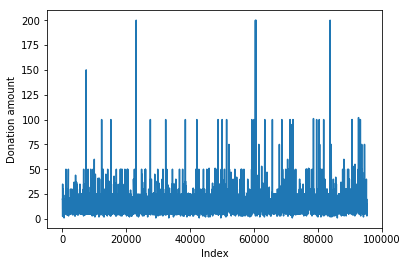

200.0 1.0


In [5]:
donation_amount = bristol[bristol['Target_D'] > 0.0].Target_D
plt.plot(donation_amount)
plt.xlabel("Index")
plt.ylabel("Donation amount")
plt.show()
print(max(donation_amount),min(donation_amount))

In [8]:
#finding correlation between target variables and other factors
target_b_corr = bristol.corr()["Target_B"].copy()
print(len(target_b_corr))
postive_corr = target_b_corr.loc[target_b_corr > 0.0]
negative_corr = target_b_corr.loc[target_b_corr < 0.0]
neutral_corr = target_b_corr.loc[target_b_corr == 0.0]

1315


In [ ]:
np.set_printoptions(threshold=sys.maxsize)
plt.figure(1, figsize=((20,20)))
plt.plot(negative_corr)
plt.title("Negative correlation")
print(pd.DataFrame(negative_corr).index)
plt.figure(2, figsize=((20,20)))
plt.plot(postive_corr)
plt.title("Positive correlation")
print(pd.DataFrame(postive_corr).index)
plt.figure(3, figsize=((20,20)))
plt.plot(neutral_corr)
plt.title("Neutral correlation")
print(pd.DataFrame(neutral_corr).index)

In [9]:
print(pd.DataFrame(postive_corr).sort_values('Target_B'))

                                                        Target_B
Date_The_Gift_Was_Received_For_95Cc__06/01/1926     5.402108e-07
Percent_Puerto_Rican                                3.716082e-06
Date_The_Gift_Was_Received_For_96Xk__14/04/1926     9.207201e-06
Major_($$)_Donor_Flag                               6.625607e-05
Date_The_Gift_Was_Received_For_94Nk__05/01/1926     6.818325e-05
Date_Of_First_Gift__13/03/1925                      9.393209e-05
Date_The_Gift_Was_Received_For_95Wl__10/01/1926     1.204087e-04
Date_The_Gift_Was_Received_For_95Tk__07/01/1926     1.204087e-04
Donor_Title__GOVER                                  1.204087e-04
Number_Of_Months_Between_First_And_Second_Gift      1.355296e-04
Date_Of_First_Gift__28/10/1923                      1.460882e-04
Date_Of_First_Gift__05/01/1926                      1.644309e-04
State__Pennsylvania                                 1.703005e-04
Date_Of_First_Gift__07/11/1923                      1.942293e-04
Childern_4-7__Child_Femal

In [10]:
print(pd.DataFrame(negative_corr).sort_values('Target_B'))

                                                  Target_B
Donation_Amount_Code_For_Rfa_2                   -0.070026
Donor_97Nk_Price_Of_Gift                         -0.070026
Donor_96Nk_Price_Of_Gift                         -0.053168
Donor_96Tk_Price_Of_Gift                         -0.050566
Donor_96Ll_Price_Of_Gift                         -0.043361
Dollar_Amount_Of_Most_Recent_Gift                -0.035526
Average_Dollar_Amount_Of_Gifts_To_Date           -0.032444
Origin_Date                                      -0.032270
Donor_96G4_Price_Of_Gift                         -0.032181
Dollar_Amount_Of_Smallest_Gift_To_Date           -0.031008
Donor_96Gk_Price_Of_Gift                         -0.023312
Percent_Female_Householder_W/_Child              -0.021762
Percent_Single_Parent_Households                 -0.020671
Date_The_96G1_Promotion_Was_Mailed__14/04/1926   -0.020328
Neighborhood_Status.1                            -0.020288
Percent_Black_<_Age_15                           -0.0198

In [ ]:
target_d_corr = bristol.corr()["Target_D"].copy()

In [ ]:
print(len(target_d_corr))
postive_d_corr = target_d_corr.loc[target_d_corr > 0.0]
negative_d_corr = target_d_corr.loc[target_d_corr < 0.0]
neutral_d_corr = target_d_corr.loc[target_d_corr == 0.0]

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
plt.figure(1, figsize=((20,20)))
plt.plot(negative_d_corr)
plt.title("Negative correlation")
#print(pd.DataFrame(negative_corr).index)
plt.figure(2, figsize=((20,20)))
plt.plot(postive_d_corr)
plt.title("Positive correlation")
#print(pd.DataFrame(postive_corr).index)
plt.figure(3, figsize=((20,20)))
plt.plot(neutral_d_corr)
plt.title("Neutral correlation")
#print(pd.DataFrame(neutral_corr).index)

In [ ]:
print("positive",pd.DataFrame(postive_d_corr).sort_values('Target_D'))   #### target b and target d are highly correlated
print("Negative",pd.DataFrame(negative_d_corr).sort_values('Target_D'))

In [11]:
unwanted_cols = []
bristol_dat = bristol.var()
unwanted_cols.extend(bristol_dat.index[bristol_dat < 0.001])
#remove columns which are mostly sparse i.e columns that contain less than 1 % of total data
unwanted_cols.extend(bristol.columns[bristol.count() < int(bristol.shape[0] * 0.01)])
bristol_preprocessed = bristol.drop(unwanted_cols,axis=1)
#bristol_test_preprocessed = bristol.drop(unwanted_cols,axis=1)
#imputation of mean values for int and float and for object mode values
for col in bristol_preprocessed:
    if len(bristol_preprocessed.loc[bristol_preprocessed[col].isna()]) != 0:
        if str(bristol_preprocessed[col].dtypes) == 'int64' or str(bristol_preprocessed[col].dtypes) == 'float64':
            bristol_preprocessed[col].fillna(bristol_preprocessed[col].mean(skipna=True),inplace=True)
        elif str(bristol_preprocessed[col].dtypes) == 'object':
            bristol_preprocessed[col].fillna(bristol_preprocessed[col].mode().iloc[0],inplace=True)
print(unwanted_cols)

['Donor_97Nk_Status', 'Donor_Status_1997', 'Donor_Title__ARMY', 'Donor_Title__GOVER', 'Donor_Title__RELIGIOUS', 'State__0', 'State__Armed_Forces_Africa', 'State__Armed_Forces_Americas', 'State__Armed_Forces_Pacific', 'State__Connecticut', 'State__Delaware', 'State__District_of_Columbia', 'State__Maine', 'State__Maryland', 'State__Massachusetts', 'State__New_Hampshire', 'State__New_Jersey', 'State__New_York', 'State__Ohio', 'State__Pennsylvania', 'State__Rhode_Island', 'State__Vermont', 'State__Virginia', 'State__West_Virginia', 'DOB_Year__1900.0', 'Recency Of Giving__DormantDonor', 'Recency Of Giving__InactiveDonor', 'Recency Of Giving__LapsedDonor', 'Frequency Of Giving__2to4_gifts', 'Frequency Of Giving__5+_gifts', 'Amount Of Giving__LessDonor', 'Amount Of Giving__MajorDoner_5+', 'Amount Of Giving__TopDonor_1+', 'EPVA/PVA_Northeastern_US__EPVA_StateVA_State_Northeastern_US', 'Age_Flag__I', 'Children_0-3__Child_BothGenders', 'Date_The_97Nk_Promotion_Was_Mailed__26/07/1926', 'Date_The_

In [12]:
print(len(unwanted_cols))

397


In [13]:
#feature selection based on corelation i.e higher correlated variables shows most impact on the data by balancing the dataset.
#so postive and correlated values which are higher than 0.01 are considered
#to do that categorical values are changed to ordinal
bristol_preprocessed.apply(np.random.permutation)        #shuffling data to ensure data has no predefined order
positive_labels = bristol_preprocessed['Target_B'] == 1  #postive labels
positive_examples = bristol_preprocessed[positive_labels] #positive rows
negative_examples = bristol_preprocessed[bristol_preprocessed['Target_B'] == 0][:sum(positive_labels)] #equal number of negative rows for balancing
subset_data = positive_examples.append(negative_examples,ignore_index=True)
#changed_data = pd.get_dummies(subset_data) #changing categorical values
changed_data_corr = subset_data.corr()['Target_B'].copy() #coorelation
#print(changed_data.describe())

In [14]:
positive_correlation = changed_data_corr.loc[changed_data_corr >= 0.01].index
negative_correlation = changed_data_corr.loc[changed_data_corr <=-0.01].index
print(pd.DataFrame(changed_data_corr).sort_values('Target_B'))
imporatant_features = list(set(positive_correlation.append(negative_correlation)))
print(len(imporatant_features))

                                                 Target_B
Percent_Children_Age_7_-_13                     -0.032480
Date_The_Gift_Was_Received_For_95Cc__07/01/1926 -0.032148
Date_Of_First_Gift__01/12/1924                  -0.031364
Date_Of_First_Gift__29/06/1925                  -0.027635
Percent_Households_W/_Income_$75,000_-_$99,999  -0.024154
Date_Of_First_Gift__04/02/1924                  -0.024136
Date_Of_First_Gift__08/02/1924                  -0.023945
Percent_Employed_In_Retail_Industry             -0.023915
Date_The_95X1_Promotion_Was_Mailed__04/10/1925  -0.022652
Date_The_Gift_Was_Received_For_95Wl__04/01/1926 -0.022557
Donor_95Xk_Price_Of_Gift                        -0.022429
Date_Of_First_Gift__24/05/1924                  -0.022257
Percent_Renters_Paying_>=_$200_Per_Month        -0.022181
Home_Pc_Owners/Users                            -0.022180
Number_Of_Lifetime_Gifts_To_Date                -0.022143
Percent_Housing_Units_W/_Well_Water_Source      -0.021459
Childern_4-7__

In [15]:
#getting data from important features
bristol_changeddata = bristol_preprocessed[imporatant_features]
#bristol_changeddata = pd.get_dummies(bristol_preprocessed)[imporatant_features]
print(bristol_changeddata.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets
X_traindata = bristol_changeddata.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_traindata = bristol_changeddata['Target_B']

(95412, 295)


In [16]:
#logistic regression using penalities
cspace = np.logspace(-4,5,num=10) #from 10^-4 to 10^5 and 19 values in between
np_arrayf1train = np.ones((10,10))
np_arrayf1val = np.ones((10,10))
for c in range(len(cspace)):
    
    split = 0
    skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #stratified fold for class balancing 10 spilts
    for train_index, test_index in skf.split(X_traindata, y_traindata):
        lr = LogisticRegression(max_iter = 200,C=cspace[c]) 
        X_train, X_test = X_traindata.iloc[train_index], X_traindata.iloc[test_index]
        y_train, y_test = y_traindata.iloc[train_index], y_traindata.iloc[test_index]
        lr.fit(X_train,y_train)
        y_skfpredict = lr.predict(X_test)
        y_skfpredict1 = lr.predict(X_train)
        #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
        np_arrayf1val[split,c] = accuracy_score(y_test,y_skfpredict,normalize=True)#accuracy
        np_arrayf1train[split,c] = accuracy_score(y_train,y_skfpredict1,normalize=True)
        split += 1
    print(np_arrayf1val[c],np_arrayf1train[c])

[0.94917208 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ] [0.94924886 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
[0.94917208 0.94917208 1.         1.         1.         1.
 1.         1.         1.         1.        ] [0.94924886 0.94924886 1.         1.         1.         1.
 1.         1.         1.         1.        ]
[0.94917208 0.94917208 0.94917208 1.         1.         1.
 1.         1.         1.         1.        ] [0.94924886 0.94924886 0.94924886 1.         1.         1.
 1.         1.         1.         1.        ]
[0.94927156 0.94927156 0.94927156 0.94927156 1.         1.
 1.         1.         1.         1.        ] [0.94923781 0.94923781 0.94923781 0.94923781 1.         1.
 1.         1.         1.         1.        ]
[0.94927156 0.94927156 0.94927156 0.94927156 0.94927156 1.
 1.         1.         1.         1.        ] [0.94923781 0.94923781 0.94923781 0.94923781 0.94923781

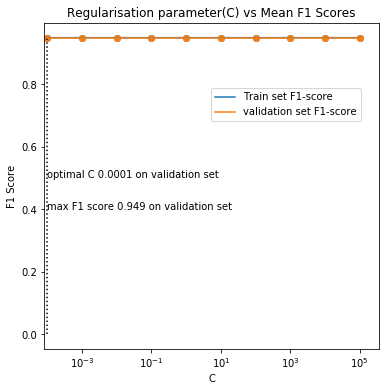

0.0001 0.9492411880306404


In [17]:
#graph representaion
f1train_mean = np_arrayf1train.mean(axis=0) #mean for each reguralisation parameter
f1val_mean = np_arrayf1val.mean(axis=0)
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plt.xscale('log')
plt.plot(cspace,f1train_mean,label='Train set F1-score')
plt.scatter(cspace,f1train_mean)
plt.plot(cspace,f1val_mean,label='validation set F1-score')
plt.scatter(cspace,f1val_mean)
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)
plt.xlim(-5.5,)
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('Regularisation parameter(C) vs Mean F1 Scores')
max_mean = max(list(f1val_mean))
index = list(f1val_mean).index(max_mean)
c_value = list(cspace)[index]
plt.vlines(c_value,0,max_mean,linestyle=":")
plt.hlines(max_mean,0,c_value,linestyle=":")
plt.annotate('optimal C {} on validation set'.format(c_value),xy=(c_value,0.5))
plt.annotate('max F1 score {:.3f} on validation set'.format(max_mean),xy=(c_value,0.4))
plt.show()
print(c_value,max_mean)
#print(f1val_mean)

In [24]:
!pip install xgboost
import re
from xgboost import XGBClassifier

In [26]:
split = 0
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #stratified fold for class balancing 10 spilts
np_arrayf1val = []
np_arrayf1train = []
np_arrayf2val = []
xgboostdata = []
var = 1
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
#xgboost expects '[', ']', '<' these characters not be there in the column names
for col in bristol_changeddata.columns:
    if any(x in str(col) for x in set(('[', ']', '<'))):
        inter = regex.sub("_", col)
        if inter not in xgboostdata:
            xgboostdata.append(inter)
        else:
            xgboostdata.append(str(inter)+str(var))
            var+=1
    else:
        inter = col
        if inter not in xgboostdata:
            xgboostdata.append(inter)
        else:
            xgboostdata.append(str(inter)+str(var))
            var+=1
#xgboostdata = [print(col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in bristol_changeddata.columns]
temp_bristol_changeddata = bristol_changeddata.copy()
temp_bristol_changeddata.columns = xgboostdata
X_traindata = temp_bristol_changeddata.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_traindata = temp_bristol_changeddata['Target_B']
for train_index, test_index in skf.split(X_traindata, y_traindata):
    xg = XGBClassifier() 
    X_train, X_test = X_traindata.iloc[train_index], X_traindata.iloc[test_index]
    y_train, y_test = y_traindata.iloc[train_index], y_traindata.iloc[test_index]
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    y_skfpredict1 = xg.predict(X_train)
    test_predictions = [round(value) for value in y_skfpredict]
    train_predictions = [round(value) for value in y_skfpredict1]
    np_arrayf2val.append(f1_score(y_test,test_predictions,average='macro'))#f1 score
    np_arrayf1val.append(accuracy_score(y_test,test_predictions,normalize=True))#accuracy
    np_arrayf1train.append(accuracy_score(y_train,train_predictions,normalize=True))
    split += 1
print("Mean f1 score:-"+str(np.array(np_arrayf1val).mean()))
print("Mean accuracy score:-"+str(np.array(np_arrayf2val).mean()))

Mean f1 score:-0.9490734951177104
Mean accuracy score:-0.4875492186103525
